### 웹 크롤링 / 웹 스크래핑
- 웹 크롤링: 웹 전체를 이동하며 웹 페이지 발견/인덱싱
- 웹 스크래핑: 특정 웹 페이지로부터 데이터 추출

robot.txt
sitemap
rss

In [1]:
import urllib.robotparser
rp =  urllib.robotparser.RobotFileParser()
rp.set_url("https://WWW.reuters.com/robots.txt")
rp.read()

In [3]:
rp.can_fetch(useragent="*",url="https://reuters.com/sitemap.xml")

True

In [5]:
sitemaps=rp.site_maps()
sitemaps

['https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml',
 'https://www.reuters.com/sitemap_video_index.xml',
 'https://www.reuters.com/brandfeature/sitemap']

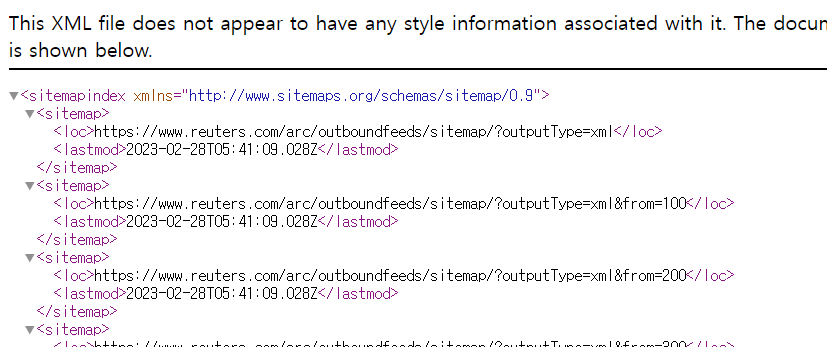

In [6]:
!pip install xmltodict

In [7]:
import xmltodict # XML파서를 위한 모튤
import requests

url = sitemaps[0]
sitemaps = xmltodict.parse(requests.get(url).text)

In [14]:
sitemaps['sitemapindex']['sitemap'][1]['loc']

IndexError: list index out of range

In [38]:
# 사이트맵에서 url만 추출(iterable 이용)
sub_sitemaps_urls=[i['loc'] for i in sitemaps['sitemapindex']['sitemap']]
sub_sitemaps_urls

['https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=700',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=800',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=900',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1000',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?output

In [34]:
response = requests.get(sub_sitemaps_urls[0])

In [35]:
urls = xmltodict.parse(response.text)

In [36]:
urls

{'urlset': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  '@xmlns:image': 'http://www.google.com/schemas/sitemap-image/1.1',
  'url': [{'loc': 'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
    'lastmod': '2023-02-28T06:30:51.395Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/VAhiE2wIqGF42htLlOrAm5QKpbA=/cloudfront-us-east-2.images.arcpublishing.com/reuters/HJX63HRYZNJLJGAQPOSEHQV45M.jpg',
     'image:caption': 'The German share price index DAX graph is pictured at the stock exchange in Frankfurt, Germany, February 27, 2023.    REUTERS/Staff'}},
   {'loc': 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
    'lastmod': '2023-02-28T06:29:10.080Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/bJSj22xxE8PlHfv9BLCLGhzVVyw=/cloudfront-us-east-2.images.arcpublishing.com/reuters/E4WVOANN2FJD3GHH354WDLWAJY.jpg',
     'image:caption': 'Marian Fernandez, 56

In [42]:
news_urls=[news_url['loc'] for news_url in urls['urlset']['url']]

In [43]:
news_urls

['https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/',
 'https://www.reuters.com/business/retail-consumer/home-zara-fast-slow-fashion-collide-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28/',
 'https://www.reuters.com/markets/asia/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28/',
 'https://www.reuters.com/lifestyle/sports/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28/',
 'https://www.reuters.com/technology/cryptoverse-bitcoin-moves-towards-satoshis-payment-dream-2023-02-28/',
 'https://www.reuters.com/markets/europe/ecb-has-started-win-inflation-fight-lane-says-2023-02-28/',
 'https://www.reuters.com/markets/rates-bonds/banks-pile-into-euro-zone-bond-sales-rates-shoot-up-2023-02-28/',
 'https://www.reuters.com/business/adecco-sees-signs-hiring-slowdown-start-2023-2023-02-28/',
 'https://www.reuters.com/world/us/tennessee-me

In [47]:
%%time
# session 추상화
session = requests.Session()

# url을 통해 datas 폴더에 html문서 다운로드
for url in news_urls[:5]:
    file = url.split("/")[-2]+'.html'
    
    response = session.get(url)
    if response.ok:
        with open("datas/"+file,"w+b") as f:
            f.write(response.text.encode('utf-8'))
    else:
            print(f"error with URL : {url}")

Wall time: 769 ms


In [49]:
# filename.txt 파일을 쓰기 모드(w)로 열기. open()함수는 파일 객체 반환
file = open('filename.txt','w',encoding="utf-8")

#파일 객체의 write() 메서드를 통해 문자열을 파일에 쓸 수 있음
file.write('파일에 작성할 문자열')

# 파일에 대한 처리가 끝나면 객체를 닫아야 함
file.close()

In [51]:
# with 이용 시 close()처리 필요 X(open 내부에 필요 시 encoding 작성)
with open('filename.txt','w') as file:
    file.write('파일에 작성할 문자열')
# 위의 코드와 동일하게 동작

In [52]:
with open('filename.txt','r') as file:
    print(file.read())

파일에 작성할 문자열


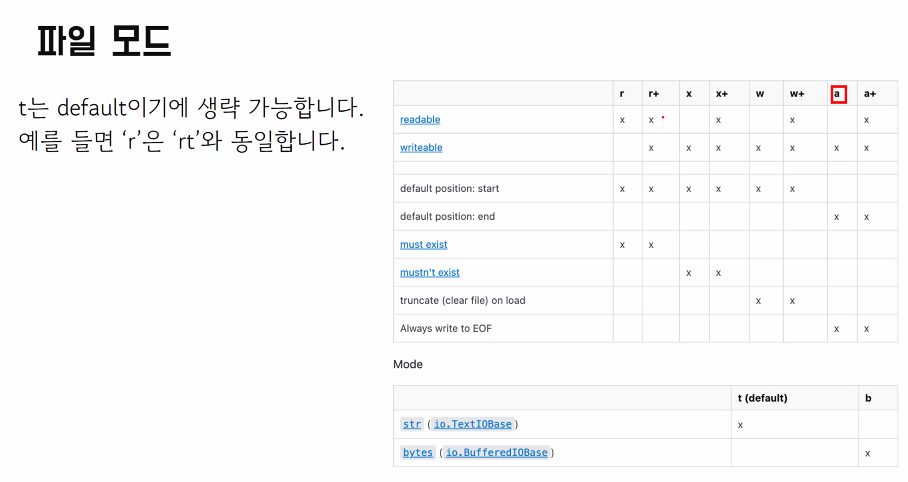

In [53]:
import os
path = "./datas/"
files = [path + file for file in os.listdir(path)]
files

['./datas/.ipynb_checkpoints',
 './datas/england-captain-stokes-has-no-regrets-over-follow-on-2023-02-28.html',
 './datas/global-markets-view-europe-2023-02-28.html',
 './datas/home-zara-fast-slow-fashion-collide-2023-02-28.html',
 './datas/indias-adani-plans-repay-up-790-mln-share-backed-loans-by-march-sources-2023-02-28.html',
 './datas/smith-says-australia-batsmen-will-ditch-risky-tempo-third-test-2023-02-28.html']

In [55]:
with open(files[2],"r", encoding='utf-8') as f:
    html = f.read()

In [65]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')
title = soup.select_one("#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > header > div > div > h1")
# 웹 페이지 창에서 f12 -> 원하는 요소 우클릭 copy -> copy selector
print(title.text)

Morning Bid: Market mood downbeat ahead of raft of data


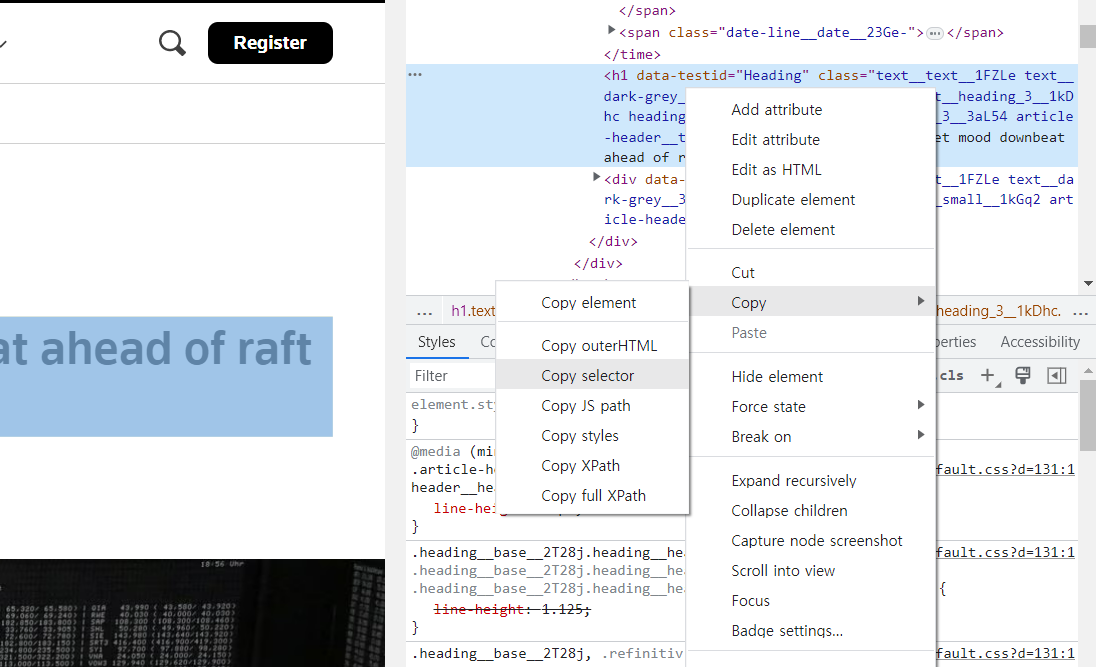

In [67]:
soup.h1

<h1 class="text__text__1FZLe text__dark-grey__3Ml43 text__medium__1kbOh text__heading_3__1kDhc heading__base__2T28j heading__heading_3__3aL54 article-header__title__3Y2hh" data-testid="Heading">Morning Bid: Market mood downbeat ahead of raft of data</h1>

In [68]:
soup.title.text

'Morning Bid: Market mood downbeat ahead of raft of data | Reuters'

In [71]:
print(soup.select_one('#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > div > div > div.article-body__content__17Yit.paywall-article').text)

A look at the day ahead in European and global markets from Anshuman DagaThe overarching downbeat mood among investors shows no signs of improving as markets become increasingly wary of a further rise in borrowing costs.Although U.S. markets took a breather and rose on Monday, they ended well below the day's highs and Asian markets were back in the red on Tuesday after gaining in early trade.Tuesday's U.S. consumer confidence data will be especially scrutinised for households' views on economic prospects and inflation expectations.Economists polled by Reuters expect a median reading of 109.5 on the index, which unexpectedly fell in January.European markets will deal with CPI data due from France and Spain.Despite sharp increases in interest rates by major central banks, predictions of economies worldwide falling into recession continue to miss the mark.While inflation has eased a bit, providing some support to markets, a barrage of economic data suggests that inflation is stickier than

In [82]:
 soup.select("p") # p태그의 값들을 리스트 형태로 가져옴

[<p class="text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__large__nEccO body__full_width__ekUdw body__large_body__FV5_X article-body__element__2p5pI" data-testid="paragraph-0" style="font-size:20px">A look at the day ahead in European and global markets from Anshuman Daga</p>,
 <p class="text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__large__nEccO body__full_width__ekUdw body__large_body__FV5_X article-body__element__2p5pI" data-testid="paragraph-1" style="font-size:20px">The overarching downbeat mood among investors shows no signs of improving as markets become increasingly wary of a further rise in borrowing costs.Although U.S. markets took a breather and rose on Monday, they ended well below the day's highs and Asian markets were back in the red on Tuesday after gaining in early trade.</p>,
 <p class="text__text__1FZLe text__dark-grey__3Ml43 text__regular__2N1Xr text__large__nEccO body__full_width__ekUdw body__large_body__FV5_X article-body__e

In [83]:
# 표준(Standard) URL(=Canonical URL)
soup.find("link",{"rel":"canonical"})["href"]

'https://www.reuters.com/markets/europe/global-markets-view-europe-2023-02-28/'